**Name: Muhammad Usman <br> Roll no: 19P-0116**

First change the runtime type from CPU to GPU:


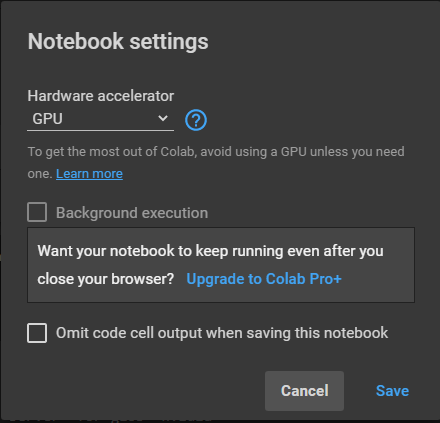

Installation:

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [ ]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graphics-driver

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-04-27 20:13:51--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-04-27 20:13:52--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?iTatZzNfaVj8ziMznKNe8BQls7JvRms2KqI-dFCwDtlQJufmVonCz2gUDA7181lNMqRw-KQSCOPK2LPgvixmUHSRl2hVzkSiW4-m4P4J-SkUQ

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [ ]:
!git config --global url."https://github.com/".insteadOf git://github.com/

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-gbukfznu
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-gbukfznu


In [ ]:
%load_ext nvcc_plugin

The nvcc_plugin extension is already loaded. To reload it, use:
  %reload_ext nvcc_plugin


**Vector Addition:**

In [ ]:
%%cu
#include<stdio.h>
#include<cuda.h>
#include<stdlib.h>
#include<time.h>


__global__ void addition(float *d_a, float *d_b, float *d_c, int n)
{
	
	// kernel function for calculating vector addition. blockIdx.x determines the block number, blockDim.x determines the number of threads per block and
	// threadIdx.x tells us the thread number in a particular block

	int i = blockIdx.x * blockDim.x + threadIdx.x;

	if(i < n)
	{
		d_c[i] = d_a[i] + d_b[i];
	}
}

int main()
{
	int n = 3;

	float *h_a, *h_b, *h_c;
	float *d_a, *d_b, *d_c;

	size_t bytes = n * sizeof(float);

	// dynamically allocating size to the device and host variables

	h_a = (float*)malloc(bytes);
	h_b = (float*)malloc(bytes);
	h_c = (float*)malloc(bytes);


	cudaMalloc((void **)&d_a, bytes);
	cudaMalloc((void **)&d_b, bytes);
	cudaMalloc((void **)&d_c, bytes);

	// accepting random elements for vectors h_a and h_b

	time_t t;
	srand((unsigned)time(&t));
	int x, y, flag;

	for (unsigned i = 0 ; i < n ; i++)
	{
		x = rand()%n;

		flag=0;
		for(int j=0;j<i;j++)
		{
			if(h_a[j]==x)
			{
				i--;
				flag=1;
				break;
			}
		}
		if(flag==0)
			h_a[i]=x;
	}

	for (unsigned i = 0 ; i < n ; i++)
	{
		y = rand()%n;

		flag=0;
		for(int j=0;j<i;j++)
		{
			if(h_b[j]==y)
			{
				i--;
				flag=1;
				break;
			}
		}
		if(flag==0)
			h_b[i]=y;
	}

	/*
	printf("\nThe vector A is: \n"); 
	for(int i = 0; i < n; i++)
	{
		printf("%f\n", h_a[i]);
		
	}
	printf("\n\nThe vector B is: \n"); 
	for(int i = 0; i < n; i++)
	{
		printf("%f\n", h_b[i]);
		
	}  
	*/

	// copying the host variables onto the device for addition	
	
	cudaMemcpy(d_a, h_a, bytes, cudaMemcpyHostToDevice);
	cudaMemcpy(d_b, h_b, bytes, cudaMemcpyHostToDevice);

	int number_of_threads_per_block = 256;

	int number_blocks = (int)ceil((float)n / number_of_threads_per_block);

	addition<<<number_blocks, number_of_threads_per_block>>>(d_a, d_b, d_c, n);

	// copying the final answer from the device to the host
	
	cudaMemcpy(h_c, d_c, bytes, cudaMemcpyDeviceToHost);

	printf("\n\nThe vector C after addition of A and B is: \n");
	for(int i = 0; i < n; i++)
	{
		printf("%f\n", h_c[i]);
	} 

	cudaFree(d_a);
	cudaFree(d_b);
	cudaFree(d_c);

	free(h_a);
	free(h_b);
	free(h_c);

	return 0;

}



The vector C after addition of A and B is: 
3.000000
1.000000
2.000000



**Matrix Multiplication:**

In [ ]:
%%cu
#include <stdio.h>
#include <math.h>
#define TILE_WIDTH 2

/*matrix multiplication kernels*/

//non shared
__global__ void
MatrixMul( float *Md , float *Nd , float *Pd , const int WIDTH )
{

           // calculate thread id

           unsigned int col = TILE_WIDTH*blockIdx.x + threadIdx.x ;

           unsigned int row = TILE_WIDTH*blockIdx.y + threadIdx.y ;

         for (int k = 0 ; k<WIDTH ; k++ )
         {
                  Pd[row*WIDTH + col]+= Md[row * WIDTH + k ] * Nd[ k * WIDTH + col] ;
          }
}

// shared
__global__ void
MatrixMulSh( float *Md , float *Nd , float *Pd , const int WIDTH )
{

        //Taking shared array to break the MAtrix in Tile widht and fatch them in that array per ele

          __shared__ float Mds [TILE_WIDTH][TILE_WIDTH] ;

           __shared__ float Nds [TILE_WIDTH][TILE_WIDTH] ;

         // calculate thread id
          unsigned int col = TILE_WIDTH*blockIdx.x + threadIdx.x ;
          unsigned int row = TILE_WIDTH*blockIdx.y + threadIdx.y ;

        for (int m = 0 ; m<WIDTH/TILE_WIDTH ; m++ ) // m indicate number of phase
       {
            Mds[threadIdx.y][threadIdx.x] =  Md[row*WIDTH + (m*TILE_WIDTH + threadIdx.x)]  ;
            Nds[threadIdx.y][threadIdx.x] =  Nd[ ( m*TILE_WIDTH + threadIdx.y) * WIDTH + col] ;
         __syncthreads() ; // for syncronizeing the threads

         // Do for tile
           for ( int k = 0; k<TILE_WIDTH ; k++ )
                       Pd[row*WIDTH + col]+= Mds[threadIdx.x][k] * Nds[k][threadIdx.y] ;
         __syncthreads() ; // for syncronizeing the threads

     }
}

// main routine
int main ()
{
   const int WIDTH = 2 ;
   float array1_h[WIDTH][WIDTH] ,array2_h[WIDTH][WIDTH],
                     result_array_h[WIDTH][WIDTH] ,M_result_array_h[WIDTH][WIDTH]  ;
  float *array1_d , *array2_d ,*result_array_d  ,*M_result_array_d ; // device array
  int i , j ;
  
  srand(time(NULL));
  
  for ( i = 0 ; i<WIDTH ; i++ )
  {
     for (j = 0 ; j<WIDTH ; j++ )
     {
        array1_h[i][j] = rand() % 10; ;
        array2_h[i][j] = rand() % 10; ;
     }
  }

  cudaMalloc((void **) &array1_d , WIDTH*WIDTH*sizeof (int) ) ;
  cudaMalloc((void **) &array2_d , WIDTH*WIDTH*sizeof (int) ) ;
  cudaMemcpy ( array1_d , array1_h , WIDTH*WIDTH*sizeof (int) , cudaMemcpyHostToDevice ) ;
  cudaMemcpy ( array2_d , array2_h , WIDTH*WIDTH*sizeof (int) , cudaMemcpyHostToDevice ) ;
  cudaMalloc((void **) &result_array_d , WIDTH*WIDTH*sizeof (int) ) ;
  cudaMalloc((void **) &M_result_array_d , WIDTH*WIDTH*sizeof (int) ) ;
 
  dim3 dimGrid ( WIDTH/TILE_WIDTH , WIDTH/TILE_WIDTH ,1 ) ;
  dim3 dimBlock( TILE_WIDTH, TILE_WIDTH, 1 ) ;

#if 0
                MatrixMul <<<dimGrid,dimBlock>>> ( array1_d , array2_d ,M_result_array_d , WIDTH) ;
#endif
 
#if 1
               MatrixMulSh<<<dimGrid,dimBlock>>> ( array1_d , array2_d ,M_result_array_d , WIDTH) ;
#endif

  cudaMemcpy(M_result_array_h , M_result_array_d , WIDTH*WIDTH*sizeof(int) ,cudaMemcpyDeviceToHost) ;

  //printing the result array
  for ( i = 0 ; i<WIDTH ; i++ )
  {
      for ( j = 0 ; j < WIDTH ; j++ )
     {
        printf ("%f   ",M_result_array_h[i][j] ) ;
     }
    printf ("\n") ;
  }
 system("pause") ;
}


sh: 1: pause: not found
40.000000   21.000000   
8.000000   5.000000   

